### Data Analysis for Period Tracking Apps (C2)

In this notebook, I will look at the categorized negative reviews from two period and fertility tracking apps, Clue and Flo. I will also create basic visualizations to give us a clearer picture of the trends and patterns that I found in those reviews.

- **c2_pt_GPT_tagged.csv**: This file contains the results of OpenAI classification, where each review from collection 2 has been tagged with one or more labels.

In [9]:
# Load the data

import pandas as pd
df = pd.read_csv('../2 Data Classification/OpenAI Classification/2 OpenAI classifier/c2_pt_GPT_tagged.csv')
df

,Unnamed: 0,date,developerResponse,review,rating,isEdited,userName,title,app_name,app_id,category,probability,l1_inaccurate_cycle_prediction,l2_unfair_functionality_charges,l3_user_data_privacy_concerns,l4_if_related_to_the_overturn
0,7,2/20/22 2:16,"{'id': 28190339, 'body': 'Hi kennaliz122,\n\nT...",I downloaded Flo when I was a sophomore in hig...,2,False,kennaliz122,Too much for too little,flo-period-pregnancy-tracker,1038369065,#NAME?,0.977951,0,1,0,0
1,8,10/3/23 17:17,"{'id': 39499342, 'body': 'Hi Kcnyee!\n\nThank ...",I’ve used Flo for years. I’ve had no problem w...,1,False,Kcnyee,Taking away free features??,flo-period-pregnancy-tracker,1038369065,#NAME?,0.984431,0,1,0,0
2,10,12/22/23 16:28,"{'id': 41056705, 'body': 'Hi there! Thank you ...",I’ve been using this app for years and years a...,1,False,I'mYourLight,No longer user friendly,flo-period-pregnancy-tracker,1038369065,#NAME?,0.998340,0,1,0,0
3,11,2/20/24 4:36,"{'id': 42439888, 'body': 'Hi there! We underst...",It’s already a struggle to get women’s reprodu...,2,False,Asialopez,Woman’s health needs to be improved,flo-period-pregnancy-tracker,1038369065,#NAME?,0.996349,0,1,0,0
4,12,6/19/22 7:23,"{'id': 30517987, 'body': ""Hi LithiumBarbie! Th...",I’ve been using the Flo app since 2017 to trac...,2,False,LithiumBarbie,Good For Keeping Track of Period Dates Only,flo-period-pregnancy-tracker,1038369065,#NAME?,0.966814,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,4779,11/22/20 5:29,"{'id': 19325772, 'body': ""Hi there! We deeply ...",I’ve been using this app for a good 4 years no...,2,False,Lola910421,The Crash Saga Continues Pt 2,clue-period-tracker-calendar,657189652,The review text falls under the following cate...,0.552608,0,1,0,0
7797,4780,11/13/20 18:32,"{'id': 19391392, 'body': 'Hello! Please reach ...",I am very upset. I signed up for a one month s...,1,False,laureno6o2,:/,clue-period-tracker-calendar,657189652,#NAME?,0.996506,0,1,0,0
7798,4782,9/17/20 23:02,NaN,I’ve used this app for years- since I started ...,2,False,So addictive!!!!,Used to be much better,clue-period-tracker-calendar,657189652,#NAME?,0.994832,0,1,0,0
7799,4786,8/9/20 16:20,NaN,"Skipped a few months using the app, and now it...",1,False,love my privacy,Account now required to use,clue-period-tracker-calendar,657189652,#NAME?,0.992691,0,0,1,0


In [10]:
# Count the occurrences of each value in the specific column

l1_value_counts = df['l1_inaccurate_cycle_prediction'].value_counts()
print(l1_value_counts)
l2_value_counts = df['l2_unfair_functionality_charges'].value_counts()
print(l2_value_counts)
l3_value_counts = df['l3_user_data_privacy_concerns'].value_counts()
print(l3_value_counts)
l4_value_counts = df['l4_if_related_to_the_overturn'].value_counts()
print(l4_value_counts)

0    7152
1     649
Name: l1_inaccurate_cycle_prediction, dtype: int64
1    5834
0    1967
Name: l2_unfair_functionality_charges, dtype: int64
0    6601
1    1200
Name: l3_user_data_privacy_concerns, dtype: int64
0    7362
1     439
Name: l4_if_related_to_the_overturn, dtype: int64


### 1. Caculate Percentage of Negative Reviews for each Labels

In [11]:
# Caculate the percentage of "1" value under each label

labels = [
    'l1_inaccurate_cycle_prediction',
    'l2_unfair_functionality_charges',
    'l3_user_data_privacy_concerns',
    'l4_if_related_to_the_overturn'
]

for label in labels:
    percentage = (df[label].value_counts(normalize=True).get(1, 0) * 100)
    #normalize=True --> converts counts to proportions
    #.get(1, 0) * 100 --> .get(key, default) retrieves the value at the "key," in this case is value "1."

    print(f"{percentage:.2f}% of the negative reviews have concerns related to {label}")    

8.32% of the negative reviews have concerns related to l1_inaccurate_cycle_prediction
74.79% of the negative reviews have concerns related to l2_unfair_functionality_charges
15.38% of the negative reviews have concerns related to l3_user_data_privacy_concerns
5.63% of the negative reviews have concerns related to l4_if_related_to_the_overturn


### 2. Look at the Percentage of User Concerns by Dates

In [12]:
#Let's take a look at user concerns by the dates
df['date'] = pd.to_datetime(df['date'])#convert date column to datetime format

#set up leak date
leak_date = pd.Timestamp('2022-05-02')
before_leak = df[df['date'] < leak_date]
after_leak = df[df['date'] >= leak_date]

#set up overturn date
overturn_date = pd.Timestamp('2022-06-24')
before_overturn = df[df['date'] < overturn_date]
after_overturn = df[df['date'] >= overturn_date]

# 05/02/2022 <= date < 06/24/2022
start_date = pd.Timestamp('2022-05-02')
end_date = pd.Timestamp('2022-06-24')
between = df[(df['date'] >= start_date) & (df['date'] < end_date)]

In [13]:
labels = [
    'l1_inaccurate_cycle_prediction',
    'l2_unfair_functionality_charges',
    'l3_user_data_privacy_concerns',
    'l4_if_related_to_the_overturn'
]

for label in labels:
    per_beforeLeak = (before_leak[label].value_counts(normalize=True).get(1, 0) * 100)
    per_afterLeak = (after_leak[label].value_counts(normalize=True).get(1, 0) * 100)
    #per_between = (between[label].value_counts(normalize=True).get(1, 0) * 100)
    per_beforeOverturn = (before_overturn[label].value_counts(normalize=True).get(1, 0) * 100)
    per_afterOverturn = (after_overturn[label].value_counts(normalize=True).get(1, 0) * 100)

    # Print the result
    print(f"Before Leak: {label}: {per_beforeLeak:.2f}%")
    print(f"After Leak: {label}: {per_afterLeak:.2f}%")
    #print(f"In between: {label}: {per_between:.2f}%")
    print(f"Before Overturn: {label}: {per_beforeOverturn:.2f}%")
    print(f"After Overturn:{label}: {per_afterOverturn:.2f}%")

Before Leak: l1_inaccurate_cycle_prediction: 12.75%
After Leak: l1_inaccurate_cycle_prediction: 5.98%
Before Overturn: l1_inaccurate_cycle_prediction: 11.57%
After Overturn:l1_inaccurate_cycle_prediction: 6.13%
Before Leak: l2_unfair_functionality_charges: 75.42%
After Leak: l2_unfair_functionality_charges: 74.45%
Before Overturn: l2_unfair_functionality_charges: 68.07%
After Overturn:l2_unfair_functionality_charges: 79.31%
Before Leak: l3_user_data_privacy_concerns: 6.56%
After Leak: l3_user_data_privacy_concerns: 20.04%
Before Overturn: l3_user_data_privacy_concerns: 16.28%
After Overturn:l3_user_data_privacy_concerns: 14.78%
Before Leak: l4_if_related_to_the_overturn: 2.08%
After Leak: l4_if_related_to_the_overturn: 7.50%
Before Overturn: l4_if_related_to_the_overturn: 5.07%
After Overturn:l4_if_related_to_the_overturn: 6.00%


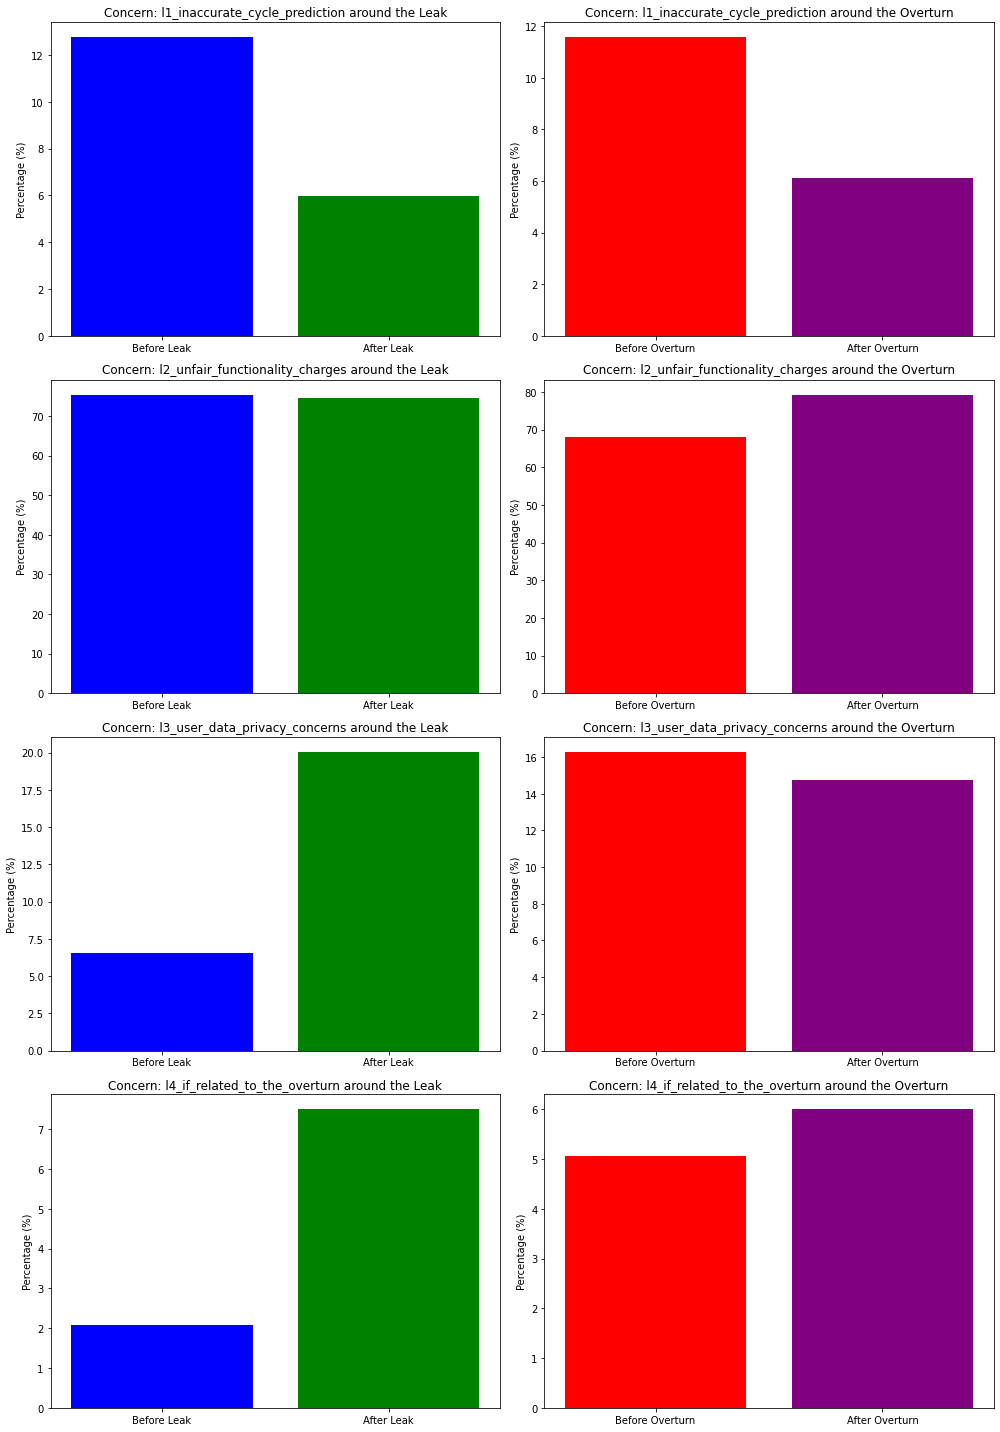

In [14]:
# Visualize the percentage of user concerns by dates - BY LABELS

import matplotlib.pyplot as plt

# Prepare a figure to plot
fig, axs = plt.subplots(len(labels), 2, figsize=(14, len(labels) * 5))

for i, label in enumerate(labels):
    # Calculate percentages for each label
    per_beforeLeak = before_leak[label].value_counts(normalize=True).get(1, 0) * 100
    per_afterLeak = after_leak[label].value_counts(normalize=True).get(1, 0) * 100
    per_beforeOverturn = before_overturn[label].value_counts(normalize=True).get(1, 0) * 100
    per_afterOverturn = after_overturn[label].value_counts(normalize=True).get(1, 0) * 100

    # Data for plotting
    periods = ['Before Leak', 'After Leak']
    values_leak = [per_beforeLeak, per_afterLeak]
    periods_overturn = ['Before Overturn', 'After Overturn']
    values_overturn = [per_beforeOverturn, per_afterOverturn]

    # Plot for leak
    axs[i, 0].bar(periods, values_leak, color=['blue', 'green'])
    axs[i, 0].set_title(f'Concern: {label} around the Leak')
    axs[i, 0].set_ylabel('Percentage (%)')

    # Plot for overturn
    axs[i, 1].bar(periods_overturn, values_overturn, color=['red', 'purple'])
    axs[i, 1].set_title(f'Concern: {label} around the Overturn')
    axs[i, 1].set_ylabel('Percentage (%)')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


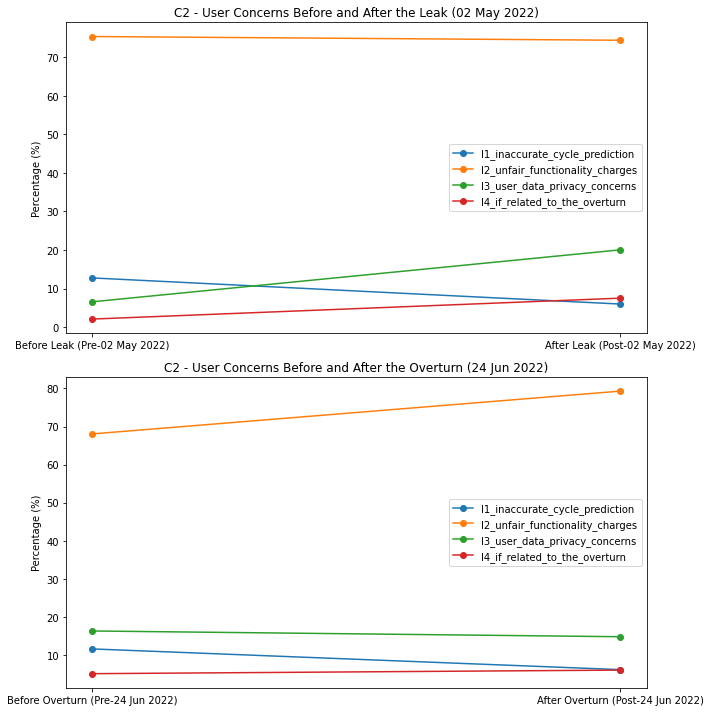

In [28]:
# Visualize the percentage of user concerns by dates - BY CUT-OFF DATES

# Prepare data for plotting
leak_percentages = []
overturn_percentages = []

for label in labels:
    leak_percentages.append([
        before_leak[label].value_counts(normalize=True).get(1, 0) * 100,
        after_leak[label].value_counts(normalize=True).get(1, 0) * 100
    ])
    overturn_percentages.append([
        before_overturn[label].value_counts(normalize=True).get(1, 0) * 100,
        after_overturn[label].value_counts(normalize=True).get(1, 0) * 100
    ])

# Create figure and axis objects
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting for leak
for idx, label in enumerate(labels):
    axs[0].plot(['Before Leak (Pre-02 May 2022)', 'After Leak (Post-02 May 2022)'], leak_percentages[idx], marker='o', label=label)
axs[0].set_title('C2 - User Concerns Before and After the Leak (02 May 2022)')
axs[0].set_ylabel('Percentage (%)')
axs[0].legend()

# Plotting for overturn
for idx, label in enumerate(labels):
    axs[1].plot(['Before Overturn (Pre-24 Jun 2022)', 'After Overturn (Post-24 Jun 2022)'], overturn_percentages[idx], marker='o', label=label)
axs[1].set_title('C2 - User Concerns Before and After the Overturn (24 Jun 2022)')
axs[1].set_ylabel('Percentage (%)')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

# Save the plot as a PNG file
#fig.savefig('user_concern_evolution_c2.png', dpi=300)  # Specify figure object explicitly


### 3. Analyze the reviews' monthly growth rate

In [20]:
df = pd.read_csv('../2 Data Classification/OpenAI Classification/2 OpenAI classifier/c2_pt_GPT_tagged.csv')
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Set 'date' as the index if it's not already
df.set_index('date', inplace=True)

In [22]:
# Resample data by month and count the number of reviews each month
monthly_review_counts = df['review'].resample('M').size() # M represents "month"
# Calculate the month-over-month growth rate in percentage
monthly_growth_rates = monthly_review_counts.pct_change().fillna(0) * 100
monthly_growth_rates

date
2020-05-31      0.000000
2020-06-30     20.000000
2020-07-31    100.000000
2020-08-31     27.777778
2020-09-30     14.492754
2020-10-31     60.759494
2020-11-30    -34.251969
2020-12-31    -31.137725
2021-01-31      2.608696
2021-02-28     30.508475
2021-03-31     41.558442
2021-04-30    -57.339450
2021-05-31      7.526882
2021-06-30    -10.000000
2021-07-31      3.333333
2021-08-31     -6.451613
2021-09-30    -16.091954
2021-10-31    -10.958904
2021-11-30     33.846154
2021-12-31     57.471264
2022-01-31    -18.978102
2022-02-28    -40.540541
2022-03-31     12.121212
2022-04-30     21.621622
2022-05-31    338.888889
2022-06-30     -9.873418
2022-07-31    -74.438202
2022-08-31      9.890110
2022-09-30    -17.000000
2022-10-31     -1.204819
2022-11-30     62.195122
2022-12-31    406.015038
2023-01-31    -42.050520
2023-02-28    -45.128205
2023-03-31     -7.009346
2023-04-30    -13.065327
2023-05-31     44.508671
2023-06-30    -35.600000
2023-07-31    -25.465839
2023-08-31      6.66

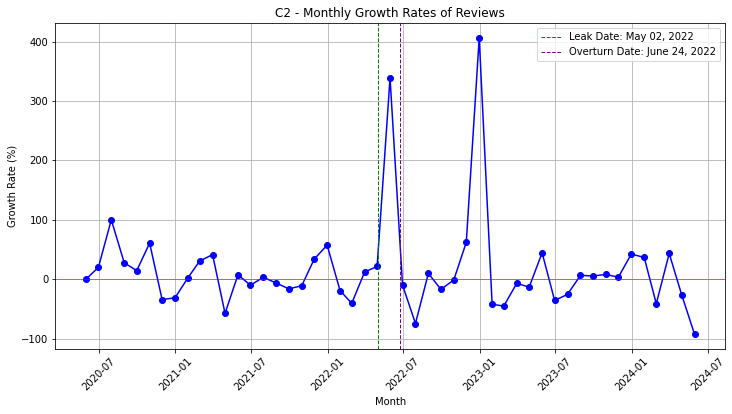

In [29]:
# Visualize the monthly growth rates

plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(monthly_growth_rates.index, monthly_growth_rates, marker='o', linestyle='-', color='b')
plt.title('C2 - Monthly Growth Rates of Reviews')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Growth Rate (%)')  # Y-axis label
plt.grid(True)  # Add gridlines
plt.axhline(0, color='red', linewidth=0.5)  # Add a horizontal line at 0 for reference
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Add vertical lines for specific dates
plt.axvline(pd.Timestamp('2022-05-02'), color='green', linestyle='--', linewidth=1, label='Leak Date: May 02, 2022')
plt.axvline(pd.Timestamp('2022-06-24'), color='purple', linestyle='--', linewidth=1, label='Overturn Date: June 24, 2022')

# Add a legend to explain the lines
plt.legend()

# Save the plot as a PNG file
#plt.savefig('monthly_growth_rates_c2.png')

# Show the plot
plt.show()


### 4. Filter Key Words for Overturn

In [159]:
# Define the keywords to search for
keywords = ['overturn', 'roe', 'roe v. wade', 'abortion']

# Filter reviews that contain any of the keywords
pt_overturn_reviews = df[df['review'].str.contains('|'.join(keywords), case=False, na=False)]
pt_overturn_reviews

# Save the filtered reviews to a new CSV file
#pt_overturn_reviews.to_csv('pt_overturn_reviews.csv', index=False)

,Unnamed: 0,date,developerResponse,review,rating,isEdited,userName,title,app_name,app_id,category,probability,l1_inaccurate_cycle_prediction,l2_unfair_functionality_charges,l3_user_data_privacy_concerns,l4_if_related_to_the_overturn
30,66,7/1/22 16:03,"{'id': 30725558, 'body': 'Hi Sammyvi! The past...",They deleted my other review because I said ho...,1,False,Sammyvi,Sells information and they purposely removed m...,flo-period-pregnancy-tracker,1038369065,#NAME?,0.980709,0,0,1,1
66,136,5/14/23 22:28,NaN,I opened an email from Flo today and instead o...,1,False,emilygraceking,Fearmongers women by promoting abortion on mot...,flo-period-pregnancy-tracker,1038369065,#NAME?,0.990367,0,0,0,1
76,160,5/14/22 14:37,"{'id': 30011445, 'body': ""Hello Luvy_Lolaxo!\n...",Hey! I used Flo for about the year but I think...,1,False,Luvy_Lolaxo,Disgusting,flo-period-pregnancy-tracker,1038369065,#NAME?,0.520109,0,1,1,1
94,200,7/25/22 0:58,"{'id': 31211196, 'body': 'Hi NishanRV! We hear...",I used to like using this app through the year...,1,False,NishanRV,Premium subscriptions annoying,flo-period-pregnancy-tracker,1038369065,#NAME?,0.984403,0,1,1,1
161,366,2/12/23 4:13,NaN,Almost all of the most recent reviews are 1 st...,1,False,MaggsMC07,Hopefully they see,flo-period-pregnancy-tracker,1038369065,#NAME?,0.842415,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,4547,10/26/20 22:55,NaN,"I just want a period tracker, not an apologist...",1,False,17473518361,Stop preaching to me about abortion.,clue-period-tracker-calendar,657189652,#NAME?,0.427514,0,0,0,1
7694,4564,8/25/22 5:08,"{'id': 31740384, 'body': ""Hey, thanks for your...",I have been using clue since my freshmen year ...,1,False,S.L.Y. Cooper,App does not properly work,clue-period-tracker-calendar,657189652,#NAME?,0.808276,0,1,1,1
7697,4569,6/25/22 20:11,"{'id': 30598248, 'body': 'Hey, thanks for reac...",great app but information is being used in roe...,2,False,🤫🖕🏻,Roe v Wade,clue-period-tracker-calendar,657189652,#NAME?,0.995869,0,0,1,1
7760,4717,3/10/23 3:43,NaN,This app literally encourages you when you mis...,1,False,DebRAHHH,Lying about Planned Parenthood,clue-period-tracker-calendar,657189652,The review text does not fit into any of the p...,0.350327,0,0,0,0
